## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Upload the dataset

In [ ]:
train_data = pd.read_csv('/content/train.csv')

In [ ]:
train_data.shape

(52310, 11)

In [ ]:
train_data.isna().sum()
# we observe that there are no null values in the train dataset as such

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

## check the statistics

In [ ]:
# we'll now see the various statistics related to the dataset
train_data.describe(include='all')

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310,52310,52310,52310,52310.000000,52310,52310.000000,52310.000000,52310.000000,52310.000000
unique,NaN,16,2,2,25,NaN,97,NaN,NaN,NaN,NaN
top,NaN,EPX,Travel Agency,Online,Cancellation Plan,NaN,SINGAPORE,NaN,NaN,NaN,NaN
freq,NaN,26218,34996,51419,13254,NaN,14242,NaN,NaN,NaN,NaN
mean,6005.745804,NaN,NaN,NaN,NaN,58.256108,NaN,48.554673,12.219963,39.555725,0.166699
std,2306.450475,NaN,NaN,NaN,NaN,109.138708,NaN,60.198589,22.847645,13.762473,0.372710
min,2000.000000,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,NaN,NaN,NaN,NaN,10.000000,NaN,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,NaN,NaN,NaN,NaN,24.000000,NaN,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,NaN,NaN,NaN,NaN,57.000000,NaN,55.000000,13.380000,43.000000,0.000000


In [ ]:
# from the description above we see that Duration has negative values also , which are not possible(stay has to be greater
# than 0) , so these records needs to be removed
# also from the description above see that the min value of age is 0 , which is again not possible , we'll have to see the 
# values of other features and decide wether to keep these records

# Data Analysis

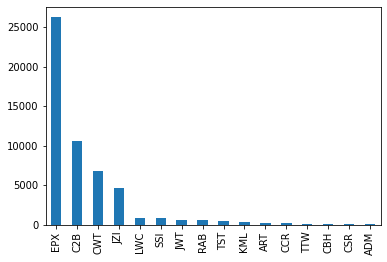

In [ ]:
train_data['Agency'].value_counts().plot(kind='bar')

### from the graph above we see that the max booking is done by EPX and far exceeds the booking done by any other agency

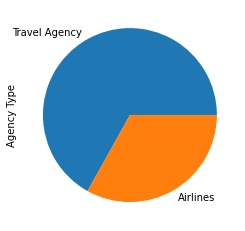

In [ ]:
train_data['Agency Type'].value_counts(normalize=True).plot.pie()

### From the plot above we observe , that the majority of booking is done by travel agency and airlines are far behind in selling the travel insurance.
### This may be because , airlines may be less aggressive while selling the travel insurance than the travel agency
### Also, in many countries, insurance is a pre requisite for visa approval.And airlines usually come into picture only when one books a ticket. So , people usually buy insurance first and then book ticket.
### It may also be because of travel agency offering attractive discounts on the package which the Airlines fail to offer.

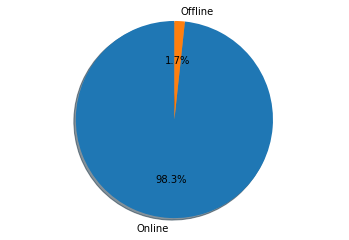

In [ ]:
labels = train_data['Distribution Channel'].value_counts().index
sizes = train_data['Distribution Channel'].value_counts(normalize=True).values

fig1 , ax1 = plt.subplots()
ax1.pie(sizes, labels = labels , autopct = '%1.1f%%', shadow = True, startangle= 90)
ax1.axis('equal')
plt.show()

### from the above pie chart we can conclude that almost all the insurance are purchased online , this can be attributed to high internet usage and saves the hassle of visiting the insurer.

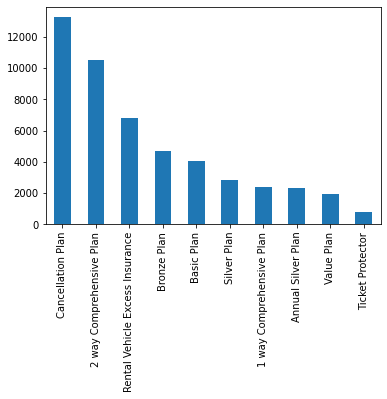

In [ ]:
train_data['Product Name'].value_counts().head(10).plot(kind='bar')

### from the chart above , we observe that the most sold plan is the Cancellation plan
### Trip Cancellation is a pre-departure benefit that can reimburse 100% of a traveler's trip cost if they need to cancel their trip for a covered reason. The most common covered reason is unforeseen illness, injury, or death of the traveler, a traveling companion, or a non-traveling family member. May also be because of non-approval of VISA

In [ ]:
train_data['Duration'].median()

24.0

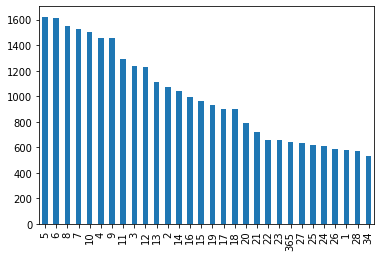

In [ ]:
train_data['Duration'].value_counts().head(30).plot(kind='bar')

### from above we observe that the median of the Duration is 24 , but we also observe that number of travellers decreasing with increase in days of stay which is understantable. Also count of travellers is considerable high for a duration of till 15 days , except 1 day for which the count is comparitively low.

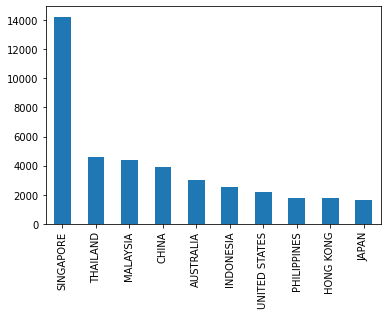

In [ ]:
train_data['Destination'].value_counts().head(10).plot(kind='bar')

### from abve graph we observe that Singapore is preferred destination and travelers to singapore far exceeds any other country

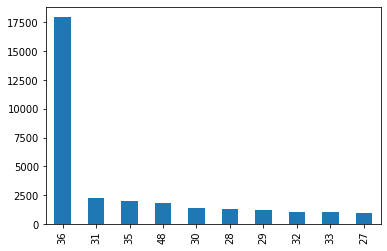

In [ ]:
train_data['Age'].value_counts().head(10).plot(kind='bar')

In [ ]:
train_data['Age'].median()

36.0

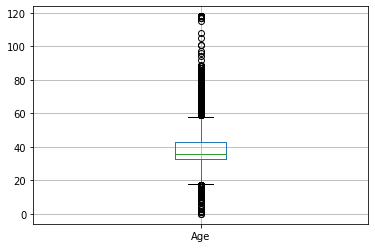

In [ ]:
train_data.boxplot(column = ['Age'])

### from the graphs above we observe  that the maximum travellers are of the age 36. Also through the boxplot , we observe a lot of outliers( ages 80 and above and below 20)

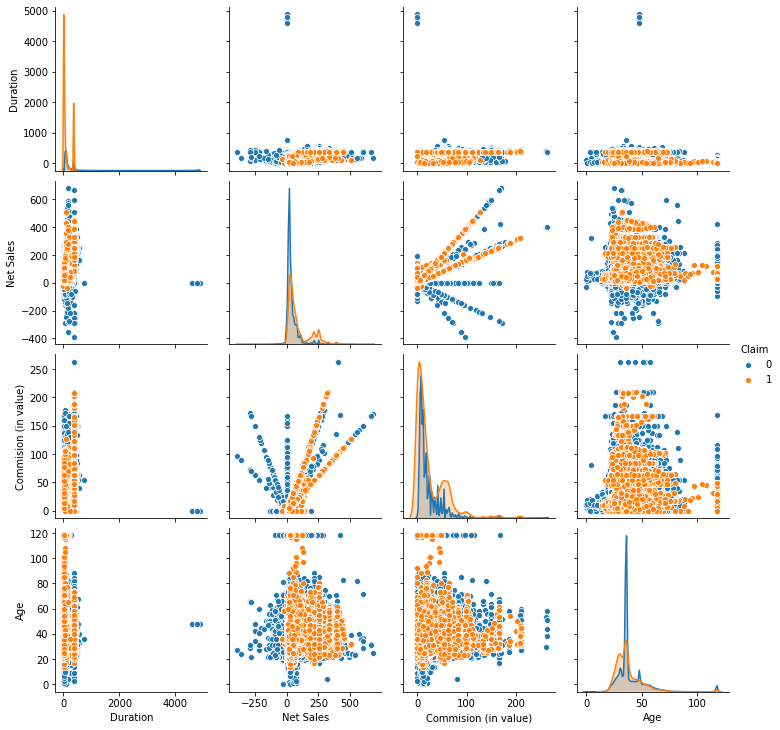

In [ ]:
#checking the relationship through the pair plot
sns.pairplot(data=train_data.drop('ID', axis=1) , hue='Claim')

### we do not see a strong relationships among the variables

In [ ]:
train_data.groupby(['Agency Type','Distribution Channel']).describe()

ID               ... Claim     
                                      count         mean  ...   75%  max
Agency Type   Distribution Channel                        ...           
Airlines      Offline                  15.0  5251.333333  ...   0.0  0.0
              Online                17299.0  5986.282213  ...   1.0  1.0
Travel Agency Offline                 876.0  6057.042237  ...   0.0  1.0
              Online                34120.0  6014.628605  ...   0.0  1.0

[4 rows x 48 columns]

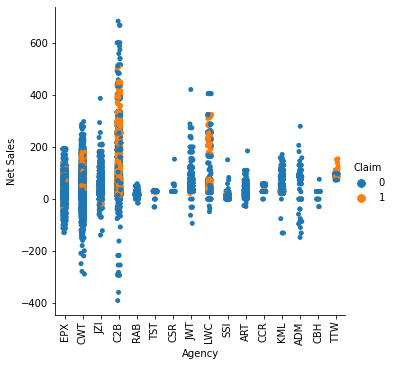

In [ ]:
chart = sns.catplot(x='Agency', y='Net Sales',hue='Claim', data = train_data)
chart.set_xticklabels(rotation = 90)

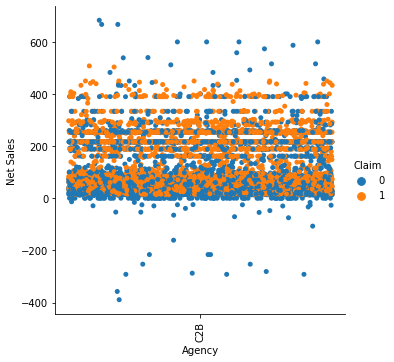

In [ ]:
chart = sns.catplot(x='Agency', y='Net Sales',hue='Claim', data = train_data[train_data['Agency']=='C2B'])
chart.set_xticklabels(rotation = 90)

### from the above chart we see that the majority of claims are made only for insurance taken from certain agencies and for others the claims are very small.

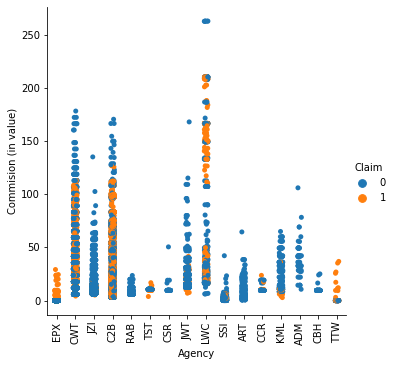

In [ ]:
chart = sns.catplot(x='Agency', y='Commision (in value)',hue='Claim', data = train_data)
chart.set_xticklabels(rotation = 90)

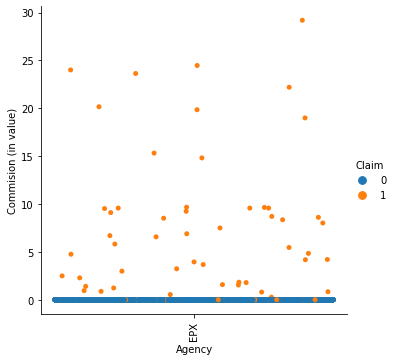

In [ ]:
chart = sns.catplot(x='Agency', y='Commision (in value)',hue='Claim', data = train_data[train_data['Agency']=='EPX'])
chart.set_xticklabels(rotation = 90)

### from the above chart we observe that the Commission for EPX agency is very less compared to other agencies and comparitively claims are also more. More investigation needs to be done for identifying the root cause.

### also for the EPX case, claims are negligible for the policies for which commission is 0 while more claims for policies having high commission. Not a single no-claim policy when commission is more than zero.

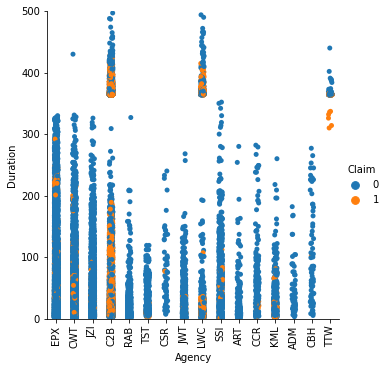

In [ ]:
chart = sns.catplot(x='Agency', y='Duration',hue='Claim', data = train_data)
axes = chart.axes
axes[0,0].set_ylim(0,500)
chart.set_xticklabels(rotation = 90)

<Figure size 1440x864 with 0 Axes>

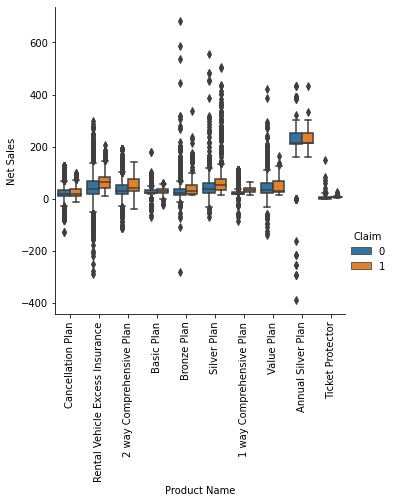

In [ ]:
top_10_products = train_data['Product Name'].value_counts().head(10).index

top_10_p = train_data[train_data['Product Name'].isin(list(top_10_products))]
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Net Sales', hue= 'Claim' , kind='box', data = top_10_p)
chart.set_xticklabels(rotation = 90)

### one observation from the above chart is , all the policies having claims as 1 have net sales of more than 0 , while no claim(0) policies have net sales of less than 0 also.

<Figure size 1440x864 with 0 Axes>

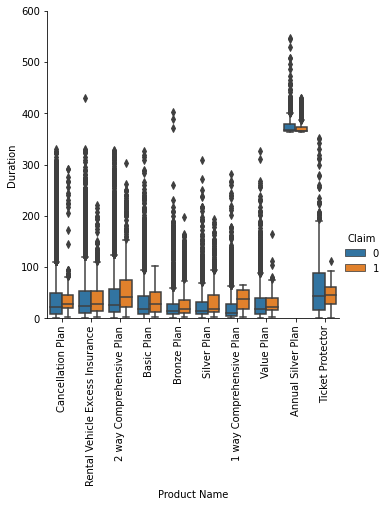

In [ ]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Duration', hue= 'Claim' , kind='box', data = top_10_p)
axes_1 = chart.axes
axes_1[0,0].set_ylim(0,600)
chart.set_xticklabels(rotation = 90)

### no major difference observed in the duration of stay of top 10 products for Claims and Non-Claims

<Figure size 1440x864 with 0 Axes>

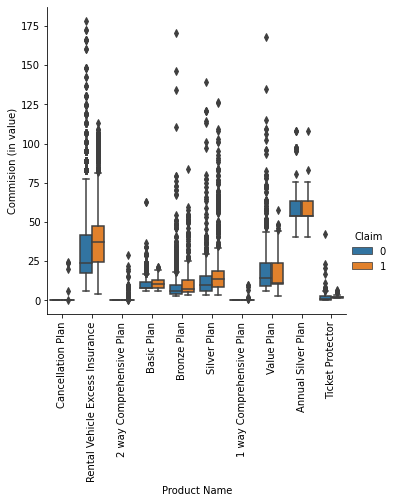

In [ ]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Commision (in value)', hue= 'Claim' , kind='box', data = top_10_p)
chart.set_xticklabels(rotation = 90)

### no major difference observed in commissions of top 10 products based on commission for Claim and No-Claim

<Figure size 1440x864 with 0 Axes>

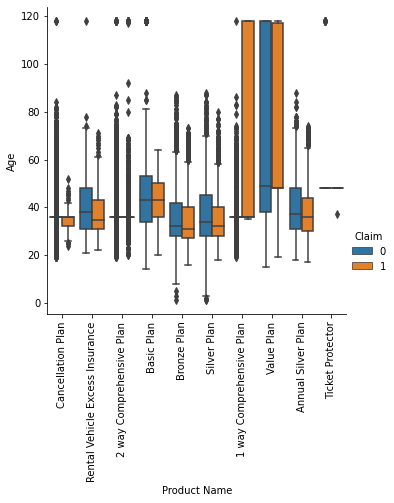

In [ ]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Product Name', y = 'Age', hue= 'Claim' , kind='box', data = top_10_p)
chart.set_xticklabels(rotation = 90)

In [ ]:
# top 10 products claim ratio

columns = ['Product_Name','claim_ratio']
prod_claim_ratio_df = pd.DataFrame(columns= columns)

for prod in list(top_10_products):
  top_prod = top_10_p[top_10_p['Product Name'] == prod]
  # print(top_prod)
  
  claim_ratio = top_prod['Claim'].value_counts().loc[1] / (top_prod['Claim'].value_counts().loc[1] + top_prod['Claim'].value_counts().loc[0])
  claim_dic = {"Product_Name": prod , "claim_ratio":claim_ratio}
  prod_claim_ratio_df.loc[len(prod_claim_ratio_df)] =  claim_dic
  
prod_claim_ratio_df

,Product_Name,claim_ratio
0,Cancellation Plan,0.026784
1,2 way Comprehensive Plan,0.138039
2,Rental Vehicle Excess Insurance,0.124468
3,Bronze Plan,0.427694
4,Basic Plan,0.060861
5,Silver Plan,0.483578
6,1 way Comprehensive Plan,0.028227
7,Annual Silver Plan,0.617973
8,Value Plan,0.047935
9,Ticket Protector,0.073077


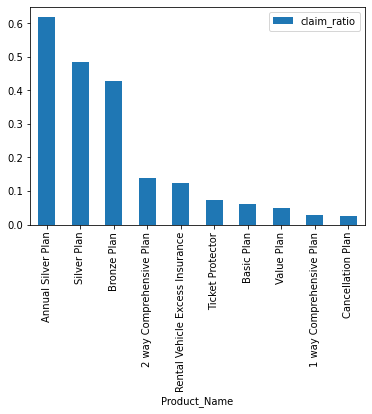

In [ ]:
#plotting the top 10 products in terms of claim
prod_claim_ratio_df.sort_values(by='claim_ratio', ascending=False).plot.bar(x='Product_Name',y='claim_ratio')

### from the above we observe that the Age bracket for Cancellation plan and 1 for Claim is pretty narrow and lies between 20 to 40 yrs . While for other plans the age bracket is very spread out
#### one can conclude , annyone taking a cancellation plan and lying in the age bracket 20-40 has a higher probability of claiming the policy insurance.

### Also from the claim ratio of the various top selling plans , we observe that there is higher probability of claims of someone buying an Annual Silver Plan than the Cancellation Plan

<Figure size 1440x864 with 0 Axes>

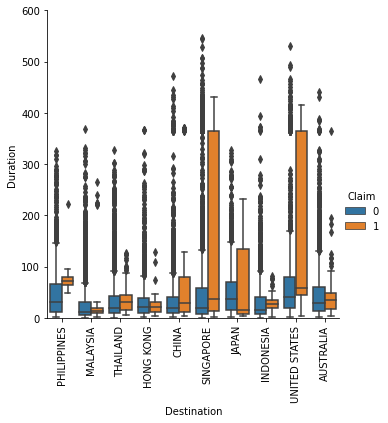

In [ ]:
top_10_destinations = train_data['Destination'].value_counts().head(10).index

top_10_d = train_data[train_data['Destination'].isin(list(top_10_destinations))]

plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Destination', y = 'Duration', hue= 'Claim' , kind='box', data = top_10_d)
axes_2 = chart.axes
axes_2[0,0].set_ylim(0,600)
chart.set_xticklabels(rotation = 90)

### from above we observe that the majority of the claims are from Singapore ,US and Japan. This is primarily because the majority of travelers are headed to Singapore and other east asian destinations.

### but this is different in case of US and Japan where travelers are less than the other east asian nations but still the Claim percentage is higher than many asian nations. This may be because of people buying policies for US Visa process and Visa getting rejected by the administration. So people claiming the policy for calcellation of travel.

### we'll have to check further for the type of policy bought for US and Japan and see the trend



<Figure size 1440x864 with 0 Axes>

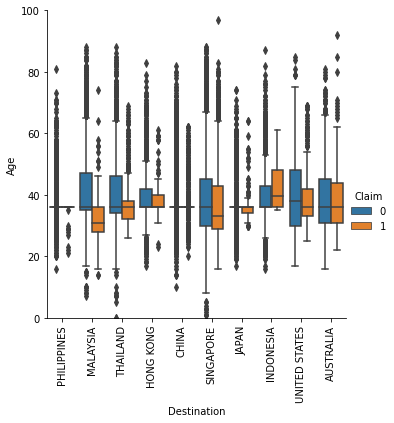

In [ ]:
plt.figure(figsize=(20,12))
chart = sns.catplot(x = 'Destination', y = 'Age', hue= 'Claim' , kind='box', data = top_10_d)
axes_2 = chart.axes
axes_2[0,0].set_ylim(0,100)
chart.set_xticklabels(rotation = 90)

In [ ]:
# we'll now try to derive the ratio of claims for each of the top destinations
# 
columns = ['Destination','claim_ratio']
des_claim_ratio_df = pd.DataFrame(columns= columns)

for dest in list(top_10_destinations):
  top_dest = top_10_d[top_10_d['Destination'] == dest]
  claim_ratio = top_dest['Claim'].value_counts()[1] / (top_dest['Claim'].value_counts()[1] + top_dest['Claim'].value_counts()[0])
  claim_dic = {"Destination": dest , "claim_ratio":claim_ratio}
  des_claim_ratio_df.loc[len(des_claim_ratio_df)] =  claim_dic
  
des_claim_ratio_df

,Destination,claim_ratio
0,SINGAPORE,0.372560
1,THAILAND,0.100395
2,MALAYSIA,0.036935
3,CHINA,0.164236
4,AUSTRALIA,0.151113
5,INDONESIA,0.038951
6,UNITED STATES,0.202186
7,PHILIPPINES,0.047301
8,HONG KONG,0.064225
9,JAPAN,0.086903


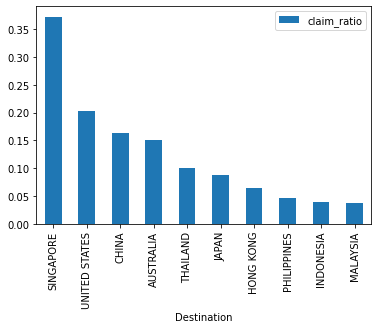

In [ ]:
# plotting the claim ratio
des_claim_ratio_df = des_claim_ratio_df.sort_values('claim_ratio', ascending=False)
des_claim_ratio_df.plot.bar(x = 'Destination',y='claim_ratio', stacked=True)

### from the bar graph above , we observe that there is higher probability of claims if the travel destination is Singapore and Unites States than the probability of claims for other countries

In [ ]:
## now we'll try to identify the products for these top destinations for which the claim ratio is higher

des_claim_ratio_df['Destination'].to_list()

['SINGAPORE',
 'UNITED STATES',
 'CHINA',
 'AUSTRALIA',
 'THAILAND',
 'JAPAN',
 'HONG KONG',
 'PHILIPPINES',
 'INDONESIA',
 'MALAYSIA']

In [ ]:
columns = ['Destination','Product_Name','claim_ratio']
top_prod_claim_ratio_df = pd.DataFrame(columns= columns)

for col in des_claim_ratio_df['Destination'].to_list():
  if col not in top_prod_claim_ratio_df['Destination'].values:
    train_data_col = train_data[train_data['Destination'] == col]
    top_product = train_data_col['Product Name'].value_counts().head(5).index
    top_product_dest = train_data_col[train_data_col['Product Name'].isin(list(top_product))]

    for prod in list(top_product):
      top_prod = top_product_dest[top_product_dest['Product Name'] == prod]

      try:
        claim_yes = top_prod['Claim'].value_counts().loc[1]
      except:
        claim_yes = 0

      try:
        claim_no = top_prod['Claim'].value_counts().loc[0]
      except:
        claim_no = 0

      claim_ratio = claim_yes / (claim_yes + claim_no)

      claim_dic = {"Destination":col, "Product_Name": prod , "claim_ratio":claim_ratio}
      top_prod_claim_ratio_df.loc[len(top_prod_claim_ratio_df)] =  claim_dic
top_prod_claim_ratio_df


,Destination,Product_Name,claim_ratio
0,SINGAPORE,Bronze Plan,0.427694
1,SINGAPORE,Silver Plan,0.483578
2,SINGAPORE,Annual Silver Plan,0.617973
3,SINGAPORE,Cancellation Plan,0.013333
4,SINGAPORE,Ticket Protector,0.073077
5,UNITED STATES,Cancellation Plan,0.054305
6,UNITED STATES,2 way Comprehensive Plan,0.386606
7,UNITED STATES,Rental Vehicle Excess Insurance,0.000000
8,UNITED STATES,Annual Travel Protect Gold,0.709877
9,UNITED STATES,1 way Comprehensive Plan,0.107692


<Figure size 432x288 with 0 Axes>

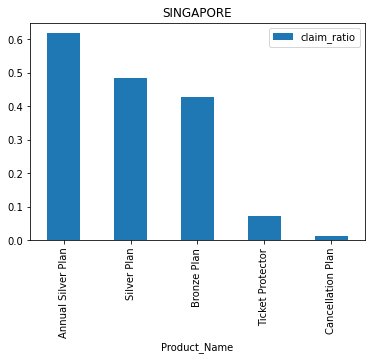

<Figure size 432x288 with 0 Axes>

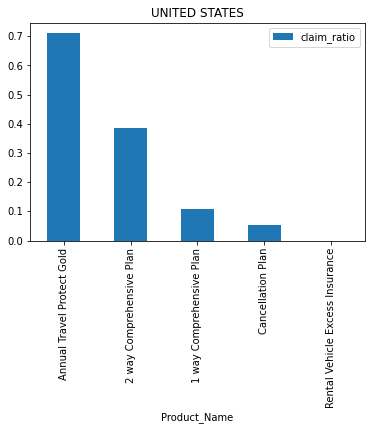

<Figure size 432x288 with 0 Axes>

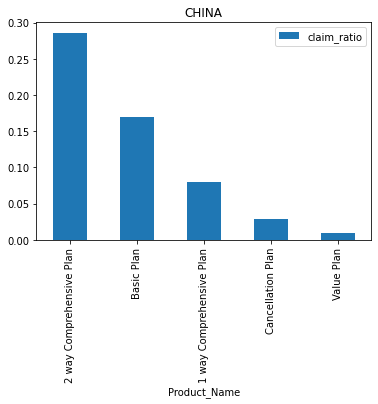

<Figure size 432x288 with 0 Axes>

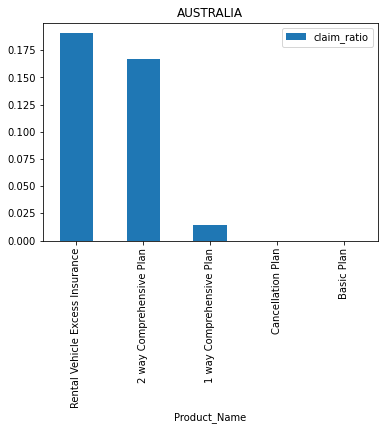

<Figure size 432x288 with 0 Axes>

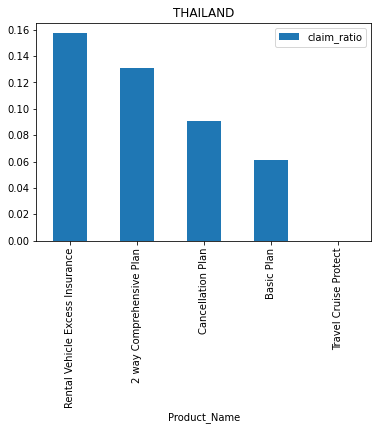

<Figure size 432x288 with 0 Axes>

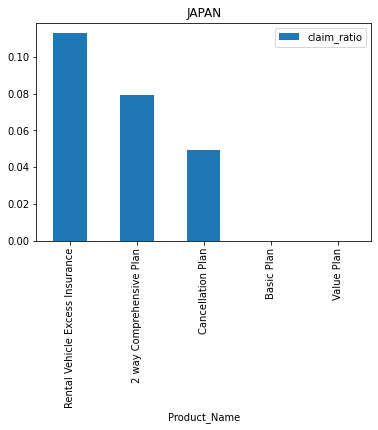

<Figure size 432x288 with 0 Axes>

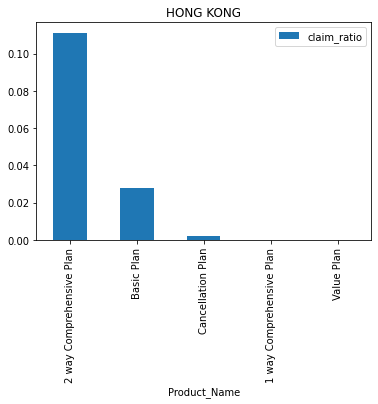

<Figure size 432x288 with 0 Axes>

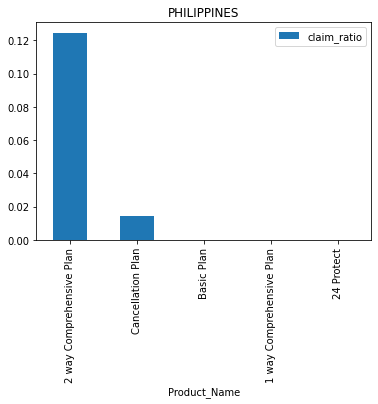

<Figure size 432x288 with 0 Axes>

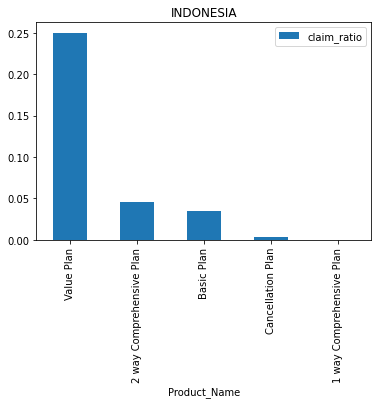

<Figure size 432x288 with 0 Axes>

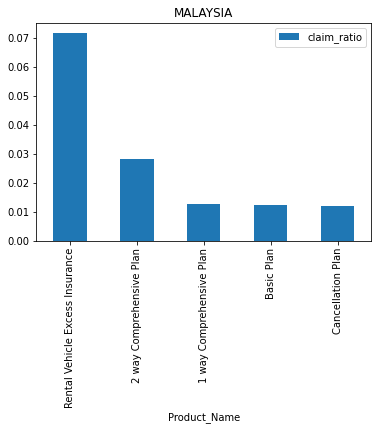

In [ ]:
## plotting the above destination wise product dataframe
unique_dest = top_prod_claim_ratio_df['Destination'].unique()

top_prod_claim_ratio_df.groupby(['Destination','Product_Name']).describe()

for col in list(unique_dest):
  if col not in top_prod_claim_ratio_df['Destination']:
    plt.figure()
    df = top_prod_claim_ratio_df[top_prod_claim_ratio_df['Destination'] == col]
    des_claim_ratio_df_final = df.sort_values('claim_ratio', ascending=False)
    des_claim_ratio_df_final.plot.bar(x = 'Product_Name',y='claim_ratio', stacked=True)
    plt.title(col)
    plt.show()

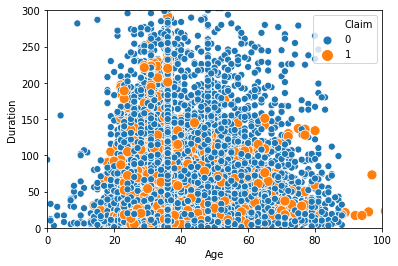

In [ ]:
# we'll try to find a relationship between age and duration and its impact on claims
ax = sns.scatterplot(y='Duration',x='Age',hue='Claim', size ='Claim',sizes = (100,50), data = train_data)
ax.set_xlim(0,100)
ax.set_ylim(0,300)
plt.show()

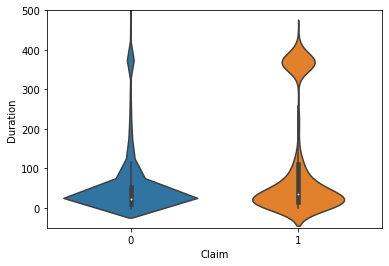

In [ ]:
ax_1 = sns.violinplot(y='Duration', x= 'Claim', data = train_data)
ax_1.set_ylim(-50,500)
plt.show()

### from the bar graph above we observe that the average duration for no-claim is less than the average duration for claim

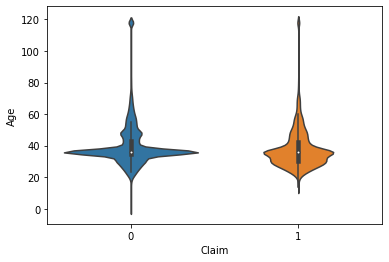

In [ ]:
  sns.violinplot(x='Claim', y='Age', data=train_data)

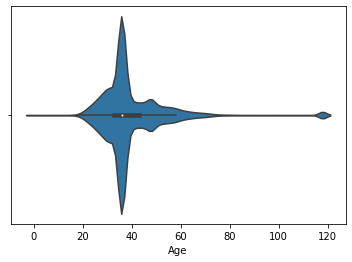

In [ ]:
sns.violinplot(x=train_data['Age'])

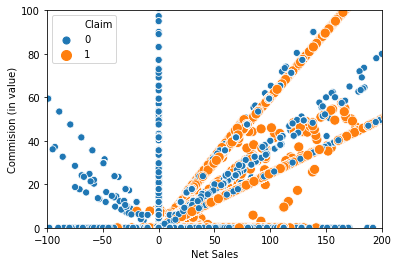

In [ ]:
ax = sns.scatterplot(y='Commision (in value)',x='Net Sales',hue='Claim', size ='Claim',sizes = (100,50), data = train_data)
ax.set_xlim(-100,200)
ax.set_ylim(0,100)
plt.show()

Text(0.5, 1.0, 'Claim Distribution')

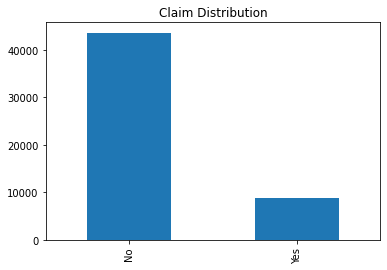

In [ ]:
plt.figure()
train_data['Claim'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.title('Claim Distribution')

### from the above chart we can clearly decipher that as the net sales increases commission also increases. And claims are only made for the policies which have positive net sales value.

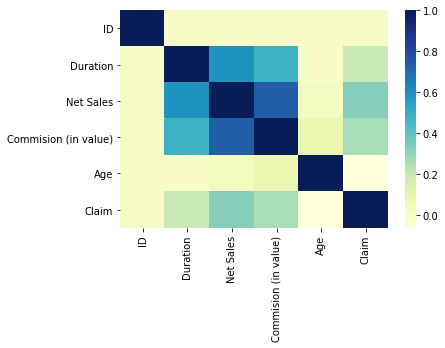

In [ ]:
# we'll check for correlation between the features and labels
sns.heatmap(train_data.corr(),cmap='YlGnBu')

# building the model

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve, classification_report , confusion_matrix , precision_score
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

In [ ]:
train_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [ ]:
train_data.columns = train_data.columns.str.replace(" ","_")

In [ ]:
# checking for null values in the dataset
train_data.isna().sum()

ID                      0
Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Duration                0
Destination             0
Net_Sales               0
Commision_(in_value)    0
Age                     0
Claim                   0
dtype: int64

## splitting the dataset into train and test set

In [ ]:
#splitting the train data into features and labels
X = train_data.drop(columns=['ID','Claim'],axis=1)
y = train_data['Claim']

In [ ]:
X = pd.get_dummies(data = X , columns = ['Agency','Agency_Type','Distribution_Channel','Product_Name','Destination'], drop_first= True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X , y , random_state = 0, test_size = 0.3 , stratify = y)

In [ ]:
print(X_train.shape, X_val.shape , y_train.shape , y_val.shape)

(36617, 141) (15693, 141) (36617,) (15693,)


## Identifying the best algorithms 

In [ ]:
def model_ranking(x_train, x_test,y_train, y_test):
    model_score = {}
   
    #SVM
    svc_clf = svm.SVC(kernel='rbf', random_state=0).fit(x_train, y_train)
    svc_pred = svc_clf.predict(x_test)
    svm_accuracy = precision_score(y_test, svc_pred)
    
    model_score['SVM'] = svm_accuracy
        
    #xgboost
    
    xgb_clf = XGBClassifier(random_state=0).fit(x_train, y_train)
    xgb_pred = xgb_clf.predict(x_test)
    xgb_accuracy = precision_score(y_test, xgb_pred)
    
    model_score['XGBOOST'] = xgb_accuracy
        
    #random forest 
    
    rf_clf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
    rf_pred = rf_clf.predict(x_test)
    rf_accuracy = precision_score(y_test, rf_pred)
    
    model_score['Random Forest'] = rf_accuracy
        
    #knn
    
    knn_clf = KNeighborsClassifier().fit(x_train, y_train)
    knn_pred = knn_clf.predict(x_test)
    knn_accuracy = precision_score(y_test, knn_pred)
    
    model_score['K Nearest Neighbours'] = knn_accuracy
        
    #Logistic Regression
    
    lr_clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    lr_pred = lr_clf.predict(x_test)
    lr_accuracy = precision_score(y_test, lr_pred)
    
    model_score['Logistic Regression'] = lr_accuracy
   
   # Stacking Classifier
    classifier1 = DecisionTreeClassifier(random_state = 0)
    classifier2 = DecisionTreeClassifier(random_state = 1)
    classifier3 = DecisionTreeClassifier(random_state = 2)
    classifier4 = DecisionTreeClassifier(random_state = 3)

    classifier_list = [classifier1, classifier2, classifier3, classifier4]

    m_classifier = LogisticRegression(random_state = 0)

    stacking_clf = StackingClassifier(classifiers = classifier_list , meta_classifier = m_classifier)

    stacking_clf.fit(x_train, y_train)
    stack_pred = stacking_clf.predict(x_test)
    stack_accuracy = precision_score(y_test, stack_pred)

    model_score['Stacking Classifier'] = stack_accuracy

    # gradient boosting
    gb_clf = GradientBoostingClassifier(random_state=0)
    gb_clf.fit(x_train, y_train)
    gb_pred = gb_clf.predict(x_test)
    gb_accuracy = precision_score(y_test, gb_pred)
    model_score['Gradient Boosting'] = gb_accuracy



    ky = list(model_score.keys())
    v = list(model_score.values())
    plt.barh(ky, v)
    
    print(model_score)
        
    return model_score

{'SVM': 0.6182033096926713, 'XGBOOST': 0.6183699870633894, 'Random Forest': 0.8216838760921367, 'K Nearest Neighbours': 0.6715384615384615, 'Logistic Regression': 0.5854665565648225, 'Stacking Classifier': 0.7547819433817904, 'Gradient Boosting': 0.6402660217654171}
CPU times: user 3min 40s, sys: 956 ms, total: 3min 41s
Wall time: 3min 40s


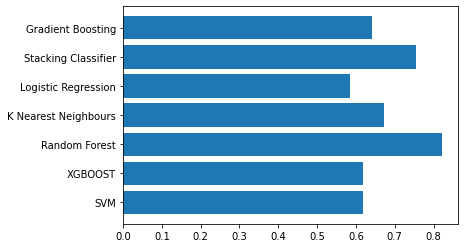

In [ ]:
%%time
results = model_ranking(X_train, X_val, y_train, y_val)

## Identifying the best parameters for random forest classifier

In [ ]:
# we observe that the RandomForestClassifier gives the best accuracy of all the classifiers. So , we'll work on Random Forest Classifier 
# and try to refine the model for better accuracy.
def fit_random_forest(x_train, y_train, x_val, y_val):
  parameter_grid = {"n_estimators":[100],
                    "max_depth":[3,None],
                    "max_features":[1,3,10],
                    "min_samples_split":[2,3,10],
                    "min_samples_leaf": [1,3,10],
                    "bootstrap":[True, False],
                    "criterion":['gini','entropy']}
                    #"warm_start":[True, False]}

  rf_classifier = RandomForestClassifier(random_state = 0)

  grid_search = GridSearchCV(estimator = rf_classifier , param_grid = parameter_grid , cv = 5)

  grid_search.fit(x_train, y_train)

  score_gs = grid_search.score(x_val, y_val)

  print(score_gs, 'best score is')

  print('best parameter set is:',grid_search.best_params_)

  print('best score is:',grid_search.best_score_)

  return grid_search.best_params_ , grid_search.best_score_

In [ ]:
%%time
best_params , best_score = fit_random_forest(X_train , y_train , X_val, y_val)

0.9365959344930861 best score is
best parameter set is: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
best score is: 0.9356582095136836
CPU times: user 27min 2s, sys: 1.34 s, total: 27min 4s
Wall time: 27min 5s


In [ ]:
#trying gradient boosting classifer
def fit_GB(x_train, y_train, x_val, y_val):
  parameter_grid = {'loss':['deviance','exponential'],
                    'learning_rate':[0.01,0.05,0.1,0.5],
                    'n_estimators':[50,100,200],
                    "min_samples_split":[2,3,10],
                    "min_samples_leaf": [1,3,10],
                    "max_depth":[3, None],
                    'max_features':['auto','sqrt','log2']}

  gb_model = GradientBoostingClassifier(random_state=5)

  grid = GridSearchCV(estimator=gb_model , param_grid = parameter_grid)

  grid.fit(x_train, y_train)

  score_gs = grid.score(x_val, y_val)

  print(score_gs, 'best score is')

  print('best parameter set is:',grid_search.best_params_)

  print('best score is:',grid_search.best_score_)

  return grid_search.best_params_ , grid_search.best_score_

In [ ]:
%%time
best_params_gb , best_score_gb = fit_GB(X_train , y_train , X_val, y_val)

## function to fit the best model and make the predictions

In [ ]:
# making a Random Forest function to fit and predict the model to data
def fit_predict(x_train, y_train , x_test):

  rf_model = RandomForestClassifier(bootstrap= True, criterion= 'entropy', 
                    max_depth= None, 
                    min_samples_leaf= 1, min_samples_split= 3, 
                    n_estimators= 100,random_state = 10 , class_weight={0:1,1:10})

  rf_model.fit(x_train, y_train)

  y_pred = rf_model.predict(x_test)

  y_pred_proba = rf_model.predict_proba(x_test)[:,1]

  return y_pred , y_pred_proba , rf_model.classes_

In [ ]:
y_pred, y_pred_proba, classes_ = fit_predict(X_train, y_train, X_val)

## Evaluate the model

In [ ]:
def evaluation(y_pred, y_val):
  class_report = classification_report (y_val, y_pred)
  conf_matrix = confusion_matrix(y_val, y_pred)
  roc_score = roc_auc_score(y_val, y_pred)
  p_score = precision_score(y_val, y_pred)
  return class_report, conf_matrix , roc_score, p_score

In [ ]:
class_report , conf_matrix, roc_score, p_score = evaluation(y_pred, y_val)
print(class_report)
print(conf_matrix)
print("Area under the roc curve is:",roc_score)
print("Precision score of the model is:",p_score)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13077
           1       0.81      0.82      0.81      2616

    accuracy                           0.94     15693
   macro avg       0.88      0.89      0.89     15693
weighted avg       0.94      0.94      0.94     15693

[[12565   512]
 [  479  2137]]
Area under the roc curve is: 0.8888716567992125
Precision score of the model is: 0.806719516798792


## Function to Plot the roc curve for the classifier

In [ ]:
#plotting the roc auc curve for it
def plot_roc_curve(y_val, y_pred_proba):
  fpr, tpr , _ = roc_curve(y_val, y_pred_proba)
  roc_auc = roc_auc_score(y_val, y_pred_proba)
  plt.plot(fpr, tpr, label = 'Random Forest, auc' + str(roc_auc))

  plt.title("Receiver Operating Characterstics")
  plt.legend(loc='Lower Right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

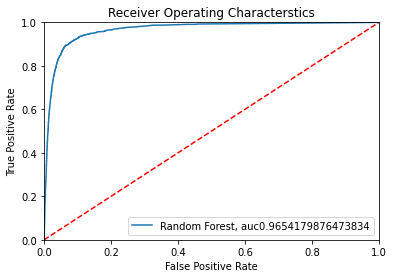

In [ ]:
plot_roc_curve(y_val, y_pred_proba)
# higher is the AUC better is the classifier

### generating the heat map and identifying the correlation between features

In [ ]:
train_data_copy = train_data.copy()

In [ ]:
corr_mat = train_data_copy.iloc[:,:-1].corr()

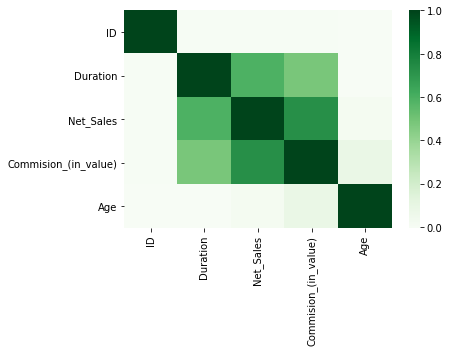

In [ ]:
sns.heatmap(corr_mat, cmap='Greens')

In [ ]:
# removing the highly correlated features
corr_triu = corr_mat.where(~np.tril(np.ones(corr_mat.shape)).astype(np.bool))

In [ ]:
## using list comprehension to filter the columns to drop
columns_to_drop = [column for column in corr_triu.columns if any (corr_triu[column]>0.60)]
columns_to_drop

['Commision_(in_value)']

In [ ]:
train_data_new = train_data_copy.drop(columns=columns_to_drop, axis=1)

In [ ]:
# split the data
X_new = train_data_new.drop(columns=['ID', 'Claim'], axis=1)
y_new = train_data_new['Claim']

In [ ]:
# doing one-hot encoding to convert the categorical features to numerical 
X_new = pd.get_dummies(data = X_new , columns=['Agency','Agency_Type','Distribution_Channel','Product_Name','Destination'], drop_first=True)

In [ ]:
# split into train and val set
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_new, y_new, random_state=0, test_size=0.3)

In [ ]:
# passing through the function to predict
y_pred_n, y_pred_proba_n, rf_model_classes_n = fit_predict(X_train_n, y_train_n, X_val_n)

In [ ]:
# calculate the accuracy
class_report_n, conf_mat_n, roc_score_n, p_score = evaluation(y_pred_n, y_val_n)
print(class_report_n)
print(conf_mat_n)
print("area under the roc curve is:",roc_score_n)
print("Precision score of the model is:",p_score)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     13079
           1       0.79      0.81      0.80      2614

    accuracy                           0.93     15693
   macro avg       0.87      0.88      0.88     15693
weighted avg       0.93      0.93      0.93     15693

[[12505   574]
 [  495  2119]]
area under the roc curve is: 0.8833739473728393
Precision score of the model is: 0.7868548087634608


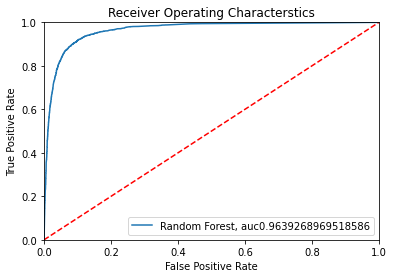

In [ ]:
# plotting the roc curve
plot_roc_curve(y_val_n, y_pred_proba_n)

## from the above we observe that the area under the curve and accuracy reduces when we remove the highly correlated features and the baseline model gives better Precision Score. So we will take all the features in the final model and make the final prediction.

# Preparing the test data and doing the final prediction

In [ ]:
# uploading the test set
test_data = pd.read_csv('/content/test.csv')

In [ ]:
# checking for null values in test data
test_data.isna().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [ ]:
# replace the space in column names with _
test_data.columns = test_data.columns.str.replace(" ","_")

In [ ]:
# converting the categorical columns to one-hot encoded columns
test_data = pd.get_dummies(data = test_data , columns = ['Agency','Agency_Type','Distribution_Channel','Product_Name','Destination'], drop_first= True)

In [ ]:
test_data.shape

(22421, 142)

In [ ]:
# pass the test data to the model to predict the output
y_pred_out,_ , _ = fit_predict(X_train, y_train, test_data.drop(columns=['ID'], axis=1))

In [ ]:
# writing the predictions to the excel file
out_data_df = pd.DataFrame({'ID':test_data['ID'], 'Claim':y_pred_out})
out_data_df.to_csv('/content/final_submission.csv', index =False)

## The evaluation metric to be used is Precision Score as Precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 
## In our case of Claims , in case the Claim is not approved and its genuine, the customer can re-apply with supporting documents and can get the claim approved.
## But if any non-genuine claim is approved , then it amounts to loss of revenue to the company and it would be pretty difficult for the company to recover the money back.